## Project  - Data Cleansing Practice on Zillow Data

In this week, we’ll practice how to do regular cleansing in Python with a real-world dataset – Zillow dataset. This Zillow dataset contains abundant missing data and will provide you a good environment to practice your skills on data cleaning.

This step-by-step project will illustrate you various ways to impute missing values.

In [1]:
# Start with importing essentials
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

#### 1. Read the train set and property set of Zillow dataset, and name them as transactions and properties.

In [2]:
properties = pd.read_csv('./properties_2016.csv')
transactions = pd.read_csv('./transactions_2016.csv')

In [3]:
properties.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2985217 entries, 0 to 2985216
Data columns (total 58 columns):
parcelid                        int64
airconditioningtypeid           float64
architecturalstyletypeid        float64
basementsqft                    float64
bathroomcnt                     float64
bedroomcnt                      float64
buildingclasstypeid             float64
buildingqualitytypeid           float64
calculatedbathnbr               float64
decktypeid                      float64
finishedfloor1squarefeet        float64
calculatedfinishedsquarefeet    float64
finishedsquarefeet12            float64
finishedsquarefeet13            float64
finishedsquarefeet15            float64
finishedsquarefeet50            float64
finishedsquarefeet6             float64
fips                            float64
fireplacecnt                    float64
fullbathcnt                     float64
garagecarcnt                    float64
garagetotalsqft                 float64
hashottub

In [4]:
transactions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90275 entries, 0 to 90274
Data columns (total 3 columns):
parcelid           90275 non-null int64
transactiondate    90275 non-null object
price              90275 non-null float64
dtypes: float64(1), int64(1), object(1)
memory usage: 2.1+ MB


#### 2. Merge two datasets into one dataframe on parcelid and call it as trans_props. Drop the column of 'parcelid' and 'transactiondate'. 

In [5]:
# join two dataframe
trans_props = transactions.merge(properties, how='left', on='parcelid')
trans_props.drop(['parcelid', 'transactiondate'], axis=1,inplace=True)
trans_props.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 90275 entries, 0 to 90274
Data columns (total 58 columns):
price                           90275 non-null float64
airconditioningtypeid           28781 non-null float64
architecturalstyletypeid        261 non-null float64
basementsqft                    43 non-null float64
bathroomcnt                     90275 non-null float64
bedroomcnt                      90275 non-null float64
buildingclasstypeid             16 non-null float64
buildingqualitytypeid           57364 non-null float64
calculatedbathnbr               89093 non-null float64
decktypeid                      658 non-null float64
finishedfloor1squarefeet        6856 non-null float64
calculatedfinishedsquarefeet    89614 non-null float64
finishedsquarefeet12            85596 non-null float64
finishedsquarefeet13            33 non-null float64
finishedsquarefeet15            3564 non-null float64
finishedsquarefeet50            6856 non-null float64
finishedsquarefeet6        

In [6]:
trans_props.head(5)

,price,airconditioningtypeid,architecturalstyletypeid,basementsqft,bathroomcnt,bedroomcnt,buildingclasstypeid,buildingqualitytypeid,calculatedbathnbr,decktypeid,...,numberofstories,fireplaceflag,structuretaxvaluedollarcnt,taxvaluedollarcnt,assessmentyear,landtaxvaluedollarcnt,taxamount,taxdelinquencyflag,taxdelinquencyyear,censustractandblock
0,127600.0,1.0,NaN,NaN,2.0,3.0,NaN,4.0,2.0,NaN,...,NaN,NaN,122754.0,360170.0,2015.0,237416.0,6735.88,NaN,NaN,6.037107e+13
1,68400.0,NaN,NaN,NaN,3.5,4.0,NaN,NaN,3.5,NaN,...,NaN,NaN,346458.0,585529.0,2015.0,239071.0,10153.02,NaN,NaN,NaN
2,96000.0,1.0,NaN,NaN,3.0,2.0,NaN,4.0,3.0,NaN,...,NaN,NaN,61994.0,119906.0,2015.0,57912.0,11484.48,NaN,NaN,6.037464e+13
3,121800.0,1.0,NaN,NaN,2.0,2.0,NaN,4.0,2.0,NaN,...,NaN,NaN,171518.0,244880.0,2015.0,73362.0,3048.74,NaN,NaN,6.037296e+13
4,95000.0,NaN,NaN,NaN,2.5,4.0,NaN,NaN,2.5,NaN,...,2.0,NaN,169574.0,434551.0,2015.0,264977.0,5488.96,NaN,NaN,6.059042e+13


From the above table, we found that there are a lot of missing values. 
So we would like to research and fix them.

#### 3.  (a) Generate a dataframe called missing_df from df_train, in which there are two columns, one is the column names of our features, the other column is the missing_count (the number of missing values) of that feature. The table should be ordered by missing_count decendingly.  

In [7]:
temp = trans_props.isnull()
temp.head(6)

,price,airconditioningtypeid,architecturalstyletypeid,basementsqft,bathroomcnt,bedroomcnt,buildingclasstypeid,buildingqualitytypeid,calculatedbathnbr,decktypeid,...,numberofstories,fireplaceflag,structuretaxvaluedollarcnt,taxvaluedollarcnt,assessmentyear,landtaxvaluedollarcnt,taxamount,taxdelinquencyflag,taxdelinquencyyear,censustractandblock
0,False,False,True,True,False,False,True,False,False,True,...,True,True,False,False,False,False,False,True,True,False
1,False,True,True,True,False,False,True,True,False,True,...,True,True,False,False,False,False,False,True,True,True
2,False,False,True,True,False,False,True,False,False,True,...,True,True,False,False,False,False,False,True,True,False
3,False,False,True,True,False,False,True,False,False,True,...,True,True,False,False,False,False,False,True,True,False
4,False,True,True,True,False,False,True,True,False,True,...,False,True,False,False,False,False,False,True,True,False
5,False,False,True,True,False,False,True,False,False,True,...,True,True,False,False,False,False,False,True,True,False


In [8]:
missing_df = trans_props.isnull().sum().reset_index()
missing_df.columns = ['column_name', 'missing_count']
missing_df = missing_df.loc[missing_df['missing_count'] > 0]
missing_df = missing_df.sort_values(by='missing_count',ascending=False)

In [9]:
# missing_df = pd.DataFrame(trans_props.isnull().sum().reset_index().values, columns=['column_name', 'missing_count'])
# missing_df = missing_df[missing_df['missing_count']>0].sort_values(by='missing_count')
# missing_df.head(6)

In [10]:
missing_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 47 entries, 6 to 32
Data columns (total 2 columns):
column_name      47 non-null object
missing_count    47 non-null int64
dtypes: int64(1), object(1)
memory usage: 1.1+ KB


In [11]:
missing_df

,column_name,missing_count
6,buildingclasstypeid,90259
13,finishedsquarefeet13,90242
3,basementsqft,90232
41,storytypeid,90232
46,yardbuildingsqft26,90180
49,fireplaceflag,90053
2,architecturalstyletypeid,90014
43,typeconstructiontypeid,89976
16,finishedsquarefeet6,89854
9,decktypeid,89617


#### 3.(b) Draw a horizontal bar plot to visualize it. Following is an example to show how this figure may look like:

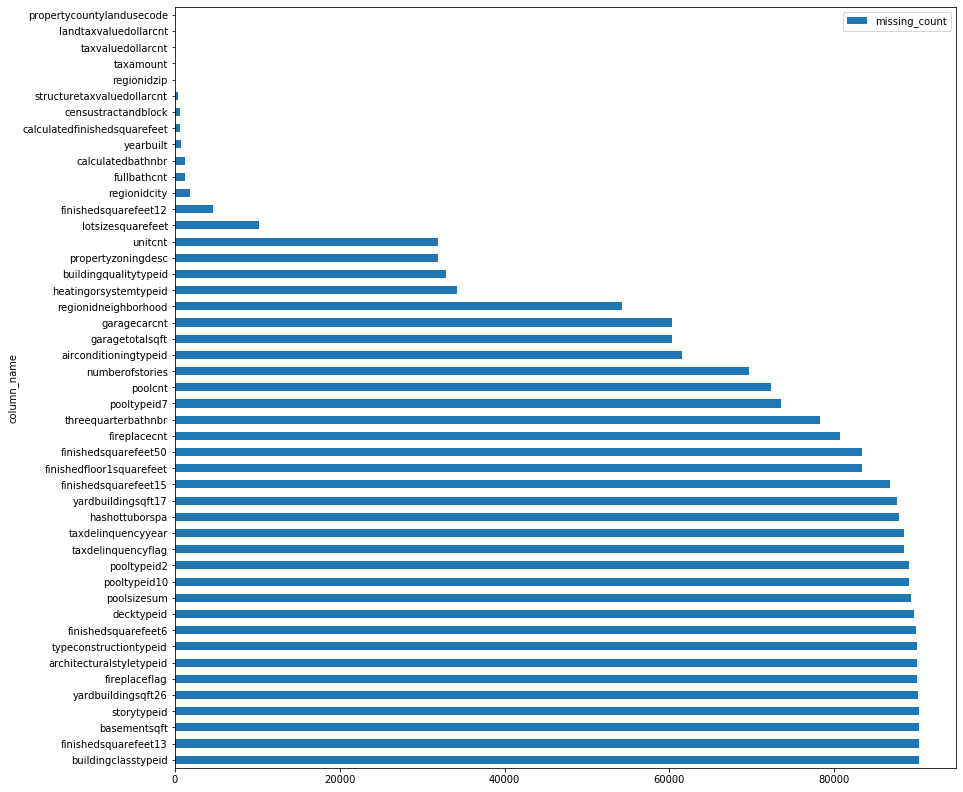

In [12]:
missing_df.plot(x='column_name', y='missing_count', kind='barh', figsize=(14,14), logx=False )
plt.show()

#### 4. Generate the correlation matrix for all the numerical features, and plot it by using heatmap or related visualization methods. 

In [13]:
## Classify the features into categorical and numerical fearures
catcols = ['airconditioningtypeid','architecturalstyletypeid',
           'buildingqualitytypeid','buildingclasstypeid','decktypeid',
           'fips','hashottuborspa','heatingorsystemtypeid','pooltypeid10',
           'pooltypeid2','pooltypeid7','propertycountylandusecode',
           'propertylandusetypeid','propertyzoningdesc','rawcensustractandblock',
           'regionidcity','regionidcounty','regionidneighborhood','regionidzip',
           'storytypeid','typeconstructiontypeid','yearbuilt','taxdelinquencyflag']
numcols = [x for x in trans_props.columns if x not in catcols]

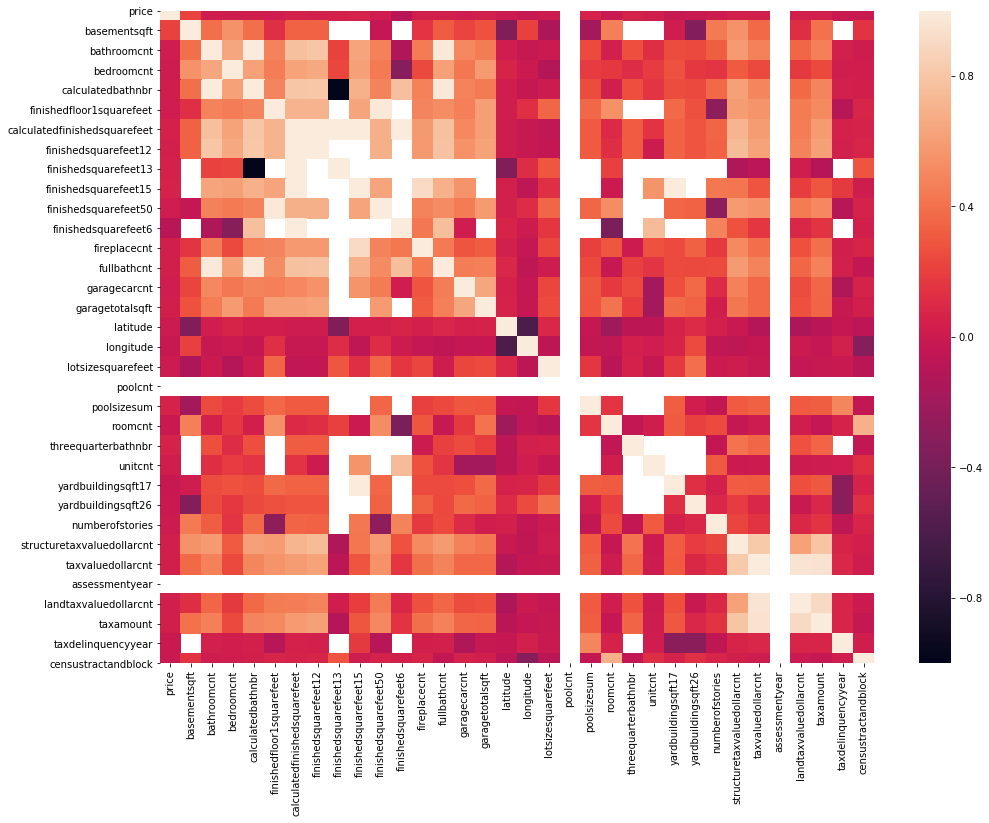

In [14]:
plt.figure(figsize = (16,12))
sns.heatmap(data=trans_props[numcols].corr())
plt.show()

#### 5. From the results from Step 4, please list those features having a strong correlation. Generate a list called dropcols, and put those redundent variables into it.

In [15]:
dropcols = []
## 'calculatedfinishedsquarefeet' 'finishedsquarefeet12' 'finishedsquarefeet13' 'finishedsquarefeet15' 
## 'finishedsquarefeet6' has strong correlations, but 'calculatedfinishedsquarefeet' doesn't have missing value, so 
## we keep it and delete the rest
dropcols.append('finishedsquarefeet12')
dropcols.append('finishedsquarefeet13')
dropcols.append('finishedsquarefeet15')
dropcols.append('finishedsquarefeet6')

In [16]:
## finishedsquarefeet50 and finishedfloor1squarefeet are the exactly the same information according to the dictionary descriptions, 
## lets remove finishedsquarefeet50 considering it has more missing values
dropcols.append('finishedsquarefeet50')

In [17]:
##'bathroomcnt' and 'calculatedbathnbr' and 'fullbathcnt' have high relationship as well.
## We keep'bathroomcnt' as has no missing values
dropcols.append('calculatedbathnbr')
dropcols.append('fullbathcnt')

### 如何对 missing value 操作的说明

* For missing values, we have the following methods to deal with them
    * Deletion
        * Listwise
        * Pairwise
        * Dropping variable
    * Imputation
        * Mean
        * Median
        * Mode
        * Treat missing as a category
* 但是在我们处理 missing value 之前，要考虑某一列是否值得我们去操作，不要做无用功

#### 6. Some variables where it is NA can be considered as the object does not exist. Such as 'hashottuborspa', if it is NA, we can assume the house doesn't contain the hot tub or spa. So we need to fix this.

(a) Fix the hashottuborspa variable, fill the na part as None.

In [18]:
trans_props['hashottuborspa']

0        NaN
1        NaN
2        NaN
3        NaN
4        NaN
        ... 
90270    NaN
90271    NaN
90272    NaN
90273    NaN
90274    NaN
Name: hashottuborspa, Length: 90275, dtype: object

In [19]:
index = trans_props.hashottuborspa.isnull()
trans_props.loc[index,'hashottuborspa'] = "N/A"

In [20]:
trans_props['hashottuborspa']

0        N/A
1        N/A
2        N/A
3        N/A
4        N/A
        ... 
90270    N/A
90271    N/A
90272    N/A
90273    N/A
90274    N/A
Name: hashottuborspa, Length: 90275, dtype: object

(b) Assume if the pooltype id and its related features is null then pool/hottub doesnt exist.

In [21]:
index = trans_props.pooltypeid2.isnull()
trans_props.loc[index,'pooltypeid2'] = 0

In [22]:
index = trans_props.pooltypeid7.isnull()
trans_props.loc[index,'pooltypeid7'] = 0

In [23]:
index = trans_props.pooltypeid10.isnull()
trans_props.loc[index,'pooltypeid10'] = 0

In [24]:
index = trans_props.poolcnt.isnull()
trans_props.loc[index,'poolcnt'] = 0

(c) Tax deliquency flag - assume if it is null then doesn't exist

In [25]:
index = trans_props.taxdelinquencyflag.isnull()
trans_props.loc[index,'taxdelinquencyflag'] = "None"

(d) If Null in garage count (garagecarcnt) it means there are no garages, and no garage means the size (garagetotalsqft) is 0 by default

In [26]:
index = trans_props.garagecarcnt.isnull()
trans_props.loc[index,'garagecarcnt'] = 0

In [27]:
index = trans_props.garagetotalsqft.isnull()
trans_props.loc[index,'garagetotalsqft'] = 0

#### 7. There are more missing values in the 'poolsizesum' than in 'poolcnt'. Fill in median values for poolsizesum where pool count is >0 and missing.

In [28]:
#Fill in those properties that have a pool with median pool value
poolsizesum_median = trans_props.loc[trans_props['poolcnt'] > 0, 'poolsizesum'].median()
trans_props.loc[(trans_props['poolcnt'] > 0) & (trans_props['poolsizesum'].isnull()), 'poolsizesum'] = poolsizesum_median

#If it doesn't have a pool then poolsizesum is 0 by default
trans_props.loc[(trans_props['poolcnt'] == 0), 'poolsizesum'] = 0

#### 8. The number of missing value of 'fireplaceflag' is more than the 'fireplacecnt'. So we need to mark the missing 'fireplace flag' as Yes when fireplacecnt>0, then the rest of 'fireplaceflag' should be marked as No. Then for the missing part in fireplacecnt, we can consider the number of fire place is 0.

In [29]:
trans_props['fireplaceflag']= "No"
trans_props.loc[trans_props['fireplacecnt']>0,'fireplaceflag']= "Yes"

index = trans_props.fireplacecnt.isnull()
trans_props.loc[index,'fireplacecnt'] = 0

#### 9. Fill some features with the most common value for those variables where this might be a sensible approach:

(a) AC Type (airconditioningtypeid)- Mostly 1's, which corresponds to central AC. It is reasonable to assume most other properties where this feature is missing are similar.

In [30]:
index = trans_props.airconditioningtypeid.isnull()
trans_props.loc[index,'airconditioningtypeid'] = 1

(b) heating or system (heatingorsystemtypeid)- Mostly 2, which corresponds to central heating so seems reasonable to assume most other properties have central heating.

In [31]:
index = trans_props.heatingorsystemtypeid.isnull()
trans_props.loc[index,'heatingorsystemtypeid'] = 2

#### 10. If the features where missing proportion is too much, we can directly delete them. Here we set 97% as our threshold (This is subjective) and add them into the dropcols. Then drop those features in dropcols from the full table.

In [32]:
missingvalues_prop = (trans_props.isnull().sum()/len(trans_props)).reset_index()  
missingvalues_prop.columns = ['field','proportion']
missingvalues_prop = missingvalues_prop.sort_values(by = 'proportion', ascending = False)
print(missingvalues_prop)
missingvaluescols = missingvalues_prop[missingvalues_prop['proportion'] > 0.90].field.tolist()
dropcols = dropcols + missingvaluescols

                           field  proportion
6            buildingclasstypeid    0.999823
13          finishedsquarefeet13    0.999634
3                   basementsqft    0.999524
41                   storytypeid    0.999524
46            yardbuildingsqft26    0.998948
2       architecturalstyletypeid    0.997109
43        typeconstructiontypeid    0.996688
16           finishedsquarefeet6    0.995336
9                     decktypeid    0.992711
56            taxdelinquencyyear    0.980249
45            yardbuildingsqft17    0.970690
14          finishedsquarefeet15    0.960521
15          finishedsquarefeet50    0.924054
10      finishedfloor1squarefeet    0.924054
42           threequarterbathnbr    0.866973
48               numberofstories    0.772141
38          regionidneighborhood    0.601086
7          buildingqualitytypeid    0.364564
34            propertyzoningdesc    0.354052
44                       unitcnt    0.353608
26             lotsizesquarefeet    0.112434
12        

In [33]:
trans_props = trans_props.drop(dropcols, axis=1)

In [34]:
trans_props.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 90275 entries, 0 to 90274
Data columns (total 41 columns):
price                           90275 non-null float64
airconditioningtypeid           90275 non-null float64
bathroomcnt                     90275 non-null float64
bedroomcnt                      90275 non-null float64
buildingqualitytypeid           57364 non-null float64
calculatedfinishedsquarefeet    89614 non-null float64
fips                            90275 non-null float64
fireplacecnt                    90275 non-null float64
garagecarcnt                    90275 non-null float64
garagetotalsqft                 90275 non-null float64
hashottuborspa                  90275 non-null object
heatingorsystemtypeid           90275 non-null float64
latitude                        90275 non-null float64
longitude                       90275 non-null float64
lotsizesquarefeet               80125 non-null float64
poolcnt                         90275 non-null float64
poolsizesum 